# Importing libraries

In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Traffic flow model
- $V$: speed of traffic $[km/h]$
- $\rho$: trafic density $[cars/km]$
- $F$: flux/flow rate of the cars $[cars/h]$

In [186]:
nx = 51
L = 11         # stretch of road [km]
V_max = 136     # maximum traffic velocity [km/h]
rho_max = 250  # car density [car/km]
dt = 0.001     # hours
dx = L/(nx-1)

In [187]:
x = np.linspace(0, L, nx)

In [188]:
def calc_V(rho, rho_max, V_max):
    V = V_max*(1-rho/rho_max)
    return V

# Initial and boundary conditions

In [189]:
rho0 = np.ones(nx)*20
rho0[10:20] = 50
BC = 20

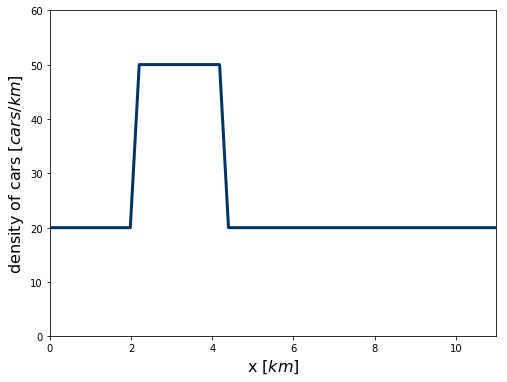

In [190]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('x $[km]$', fontsize=16)
ax.set_ylabel('density of cars $[cars/km]$', fontsize=16)
ax.set_xlim(0, L)
ax.set_ylim(0, rho0.max()*1.2)
ax.plot(x, rho0, color='#003366', lw=3)

In [191]:
V = calc_V(rho0, rho_max, V_max)

In [192]:
V.min()*1000/3600

30.222222222222225

# Integrate the equation

In [193]:
rho = rho0

In [194]:
for n in range(51):
    rhon = rho.copy()
    Fn = rhon*calc_V(rhon, rho_max, V_max)
    rho[1:] = rhon[1:] - dt/dx*(Fn[1:]-Fn[:-1])
    rho[0] = BC

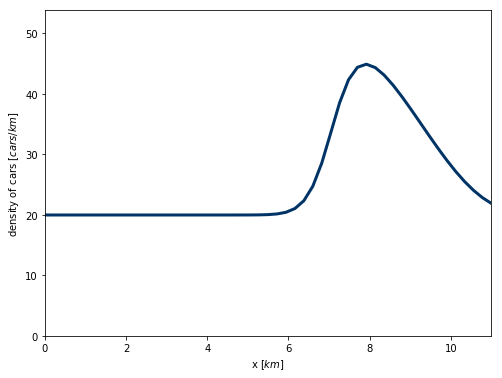

In [195]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('x $[km]$')
ax.set_ylabel('density of cars $[cars/km]$')
ax.set_xlim(0, L)
ax.set_ylim(0, rho.max()*1.2)
ax.plot(x, rho, color='#003366', lw=3)

In [196]:
V = calc_V(rho, rho_max, V_max)
V.min()*1000/3600

30.988747028020629

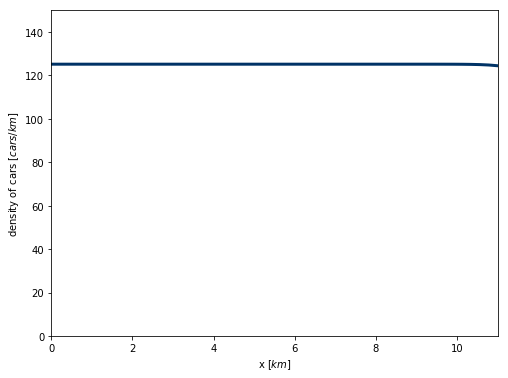

In [182]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('x $[km]$')
ax.set_ylabel('density of cars $[cars/km]$')
ax.set_xlim(0, L)
ax.set_ylim(0, V.max()*1.2)
ax.plot(x, V, color='#003366', lw=3)

In [183]:
V

array([ 125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.12      ,  125.12      ,  125.12      ,  125.12      ,
        125.11999998,  125.11999994,  125.11999978,  125.11999924,
        125.11999745,  125.11999189,  125.11997532,  125.11992816,
        125.11979956,  125.11946325,  125.1186184 ,  125.11657715,
        125.11182773,  125.10117511,  125.07812656,  125.03001883,
        124.93326481,  124.74636896,  124.40195494])

In [184]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
